In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import KernelPCA

In [ ]:
colors = ['#de3838', '#007bc3', '#ffd12a']
markers = ['o', 'x', ',']

def plot_pca(X_pca, y):
    for l, c, m, in zip(np.unique(y), colors, markers):
        plt.scatter(X_pca[y==l, 0], X_pca[y==l, 1],
                    c=c, marker=m, label=l)

    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.show()

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
# масшабируем данные
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

sc = StandardScaler()
X_std = sc.fit_transform(X)

In [ ]:
# подключаем PCA метод
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2, random_state=42).fit_transform(X_std)

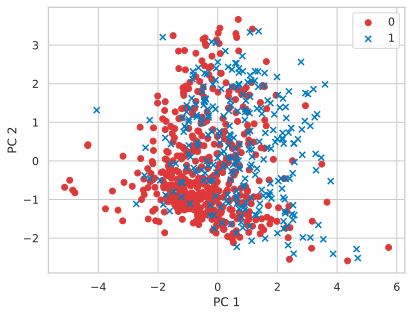

In [ ]:
plot_pca(X_pca, y)

In [ ]:
######LDA#####

In [ ]:
df2 = pd.read_csv("diabetes.csv")

In [ ]:
# масшабируем данные
from sklearn.preprocessing import StandardScaler

X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
# применяем LDA
lda = LinearDiscriminantAnalysis(n_components=1, solver='svd')
X_lda = lda.fit_transform(X, y)

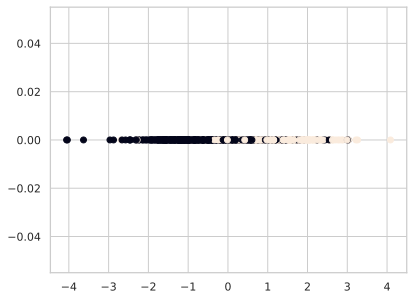

In [ ]:
# выводим результат по LDA
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y)

In [ ]:
#######TruncatedSVD#######

In [ ]:
# масшабируем данные и считываем данные
df3 = pd.read_csv("diabetes.csv")

X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
# применяем Truncate SVD
svd = TruncatedSVD(n_components=2, algorithm='randomized',
                   random_state=0)
X_svd = svd.fit_transform(X_scaled)

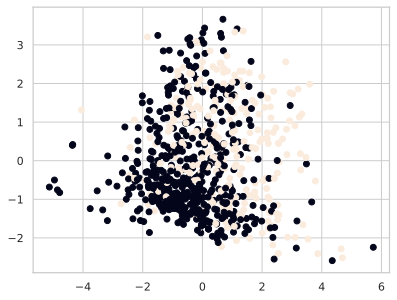

In [ ]:
# выводим результат по Truncate SVD
plt.scatter(X_svd[:,0], X_svd[:,1], c=y)

In [ ]:
#####KernelPCA######

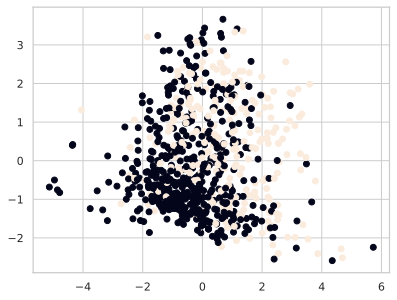

In [ ]:
kpca = KernelPCA(n_components=2, kernel='linear')
X_kpca = kpca.fit_transform(X_scaled)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)

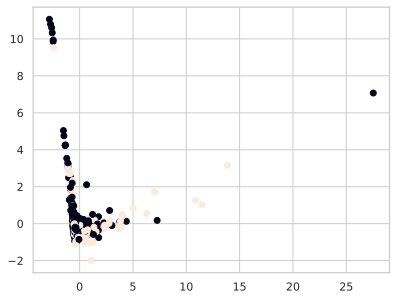

In [ ]:
kpca = KernelPCA(n_components=2, kernel='poly')
X_kpca = kpca.fit_transform(X_scaled)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)

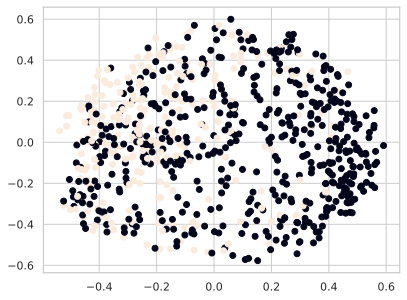

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_scaled)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)

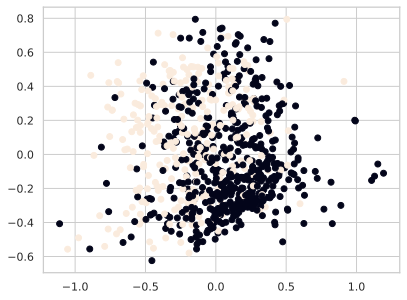

In [ ]:
kpca = KernelPCA(n_components=2, kernel='sigmoid')
X_kpca = kpca.fit_transform(X_scaled)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)

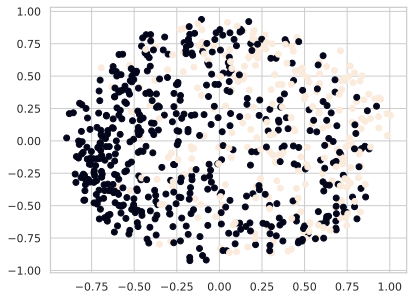

In [ ]:
kpca = KernelPCA(n_components=2, kernel='cosine')
X_kpca = kpca.fit_transform(X_scaled)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)

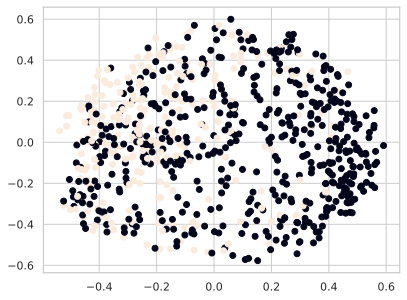

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
K = rbf_kernel(X_scaled)

# Используем KernelPCA с предварительно вычисленным ядром
kpca = KernelPCA(n_components=2, kernel='precomputed')
X_kpca = kpca.fit_transform(K)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.show()